In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [ ]:
from google.colab import drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("")


In [ ]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store


In [ ]:
df.rename(columns={'Unnamed: 0': 'Retailer'}, inplace=True)
df.rename(columns={'Unnamed: 1': 'Retailer_id'}, inplace=True)
df.rename(columns={'Unnamed: 2': 'Invoice Date'}, inplace=True)
df.rename(columns={'Unnamed: 3': 'Region'}, inplace=True)
df.rename(columns={'Unnamed: 4': 'State	'}, inplace=True)
df.rename(columns={'Unnamed: 5': 'City'}, inplace=True)
df.rename(columns={'Unnamed: 6': 'Product	'}, inplace=True)
df.rename(columns={'Unnamed: 7': 'Price per Unit'}, inplace=True)
df.rename(columns={'Unnamed: 8': 'Units Sold'}, inplace=True)
df.rename(columns={'Unnamed: 9': 'Total Sales'}, inplace=True)
df.rename(columns={'Unnamed: 10': 'Operating Profit'}, inplace=True)
df.rename(columns={'Unnamed: 11': 'Operating Margin'}, inplace=True)
df.rename(columns={'Unnamed: 12': 'Sales Method'}, inplace=True)


In [ ]:
df.head()
df

,Retailer,Retailer_id,Invoice Date,Region,State\t,City,Product\t,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Men's Apparel,$50.00,64,"$3,200",$896,28%,Outlet
9648,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Women's Apparel,$41.00,105,"$4,305","$1,378",32%,Outlet
9649,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,Manchester,Men's Street Footwear,$41.00,184,"$7,544","$2,791",37%,Outlet
9650,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,$42.00,70,"$2,940","$1,235",42%,Outlet


deleting the unnessasary first 3 recodes

In [ ]:
indices_to_delete = [1, 2, 3]
df.drop(indices_to_delete, inplace=True)

In [ ]:
df.head()

,Retailer,Retailer_id,Invoice Date,Region,State\t,City,Product\t,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
5,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
6,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
7,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store


In [ ]:




columns_to_encode = [ 'State\t', 'Price per Unit','Total Sales','Operating Profit','Operating Margin',]

label_encoder = LabelEncoder()

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

df

,Retailer,Retailer_id,Invoice Date,Region,State\t,City,Product\t,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,NaN,Adidas Sales Database,NaN,NaN,50,NaN,NaN,94,NaN,3138,4187,66,NaN
4,Foot Locker,1185732,1/1/2020,Northeast,31,New York,Men's Street Footwear,45,"1,200",2472,2475,36,In-store
5,Foot Locker,1185732,1/2/2020,Northeast,31,New York,Men's Athletic Footwear,45,"1,000",2188,954,16,In-store
6,Foot Locker,1185732,1/3/2020,Northeast,31,New York,Women's Street Footwear,35,"1,000",1898,924,21,In-store
7,Foot Locker,1185732,1/4/2020,Northeast,31,New York,Women's Athletic Footwear,40,850,1637,906,21,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,Foot Locker,1185732,1/24/2021,Northeast,28,Manchester,Men's Apparel,45,64,1362,4036,14,Outlet
9648,Foot Locker,1185732,1/24/2021,Northeast,28,Manchester,Women's Apparel,36,105,1721,294,18,Outlet
9649,Foot Locker,1185732,2/22/2021,Northeast,28,Manchester,Men's Street Footwear,36,184,2630,1616,23,Outlet
9650,Foot Locker,1185732,2/22/2021,Northeast,28,Manchester,Men's Athletic Footwear,37,70,1194,189,28,Outlet


In [ ]:


df.isnull().sum()


Retailer            1
Retailer_id         0
Invoice Date        1
Region              1
State\t             0
City                1
Product\t           1
Price per Unit      0
Units Sold          1
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        1
dtype: int64

In [ ]:


df = df.dropna()
df.isnull().sum()

Retailer            0
Retailer_id         0
Invoice Date        0
Region              0
State\t             0
City                0
Product\t           0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

<ipython-input-99-c5f0b7881734>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


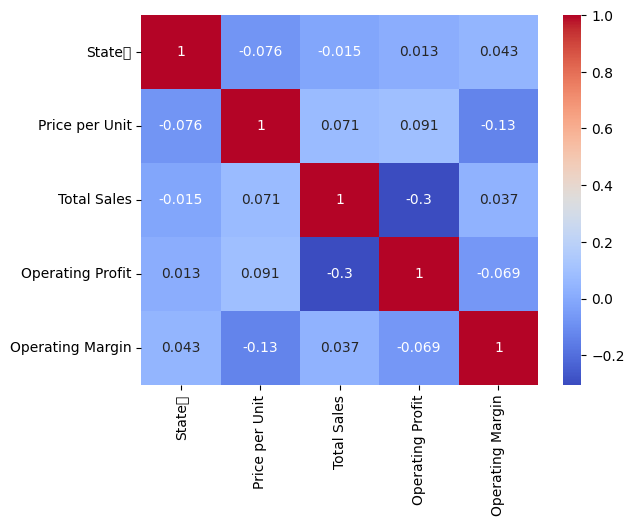

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()


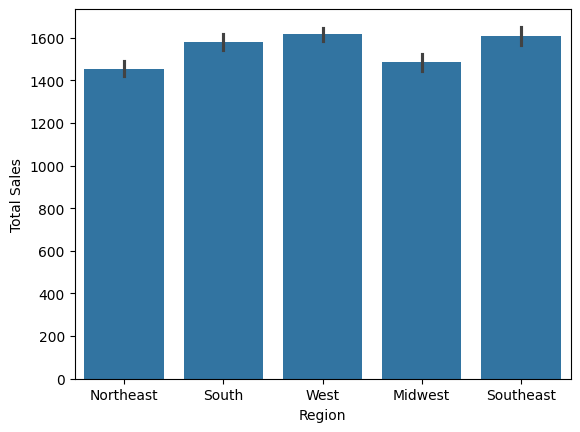

In [ ]:


sns.barplot(x='Region', y='Total Sales', data=df)
plt.show()



/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


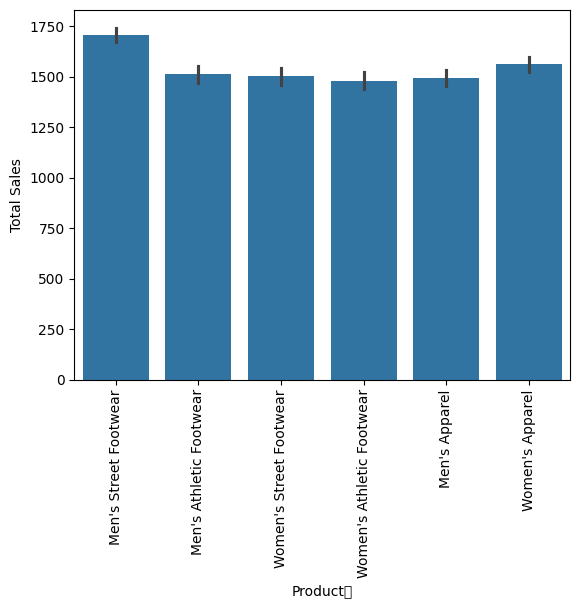

In [ ]:


sns.barplot(x='Product\t', y='Total Sales', data=df)
plt.xticks(rotation=90)
plt.show()


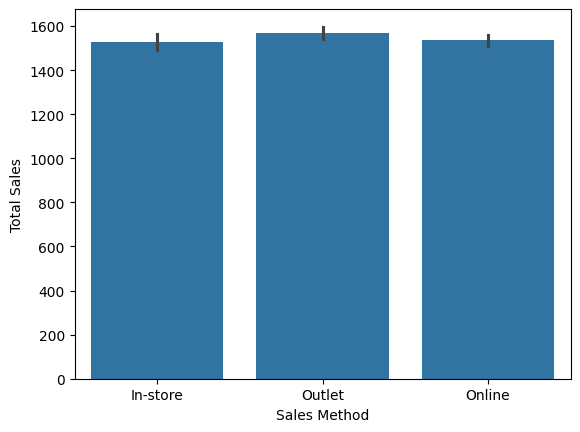

In [ ]:


sns.barplot(x='Sales Method', y='Total Sales', data=df)
plt.show()


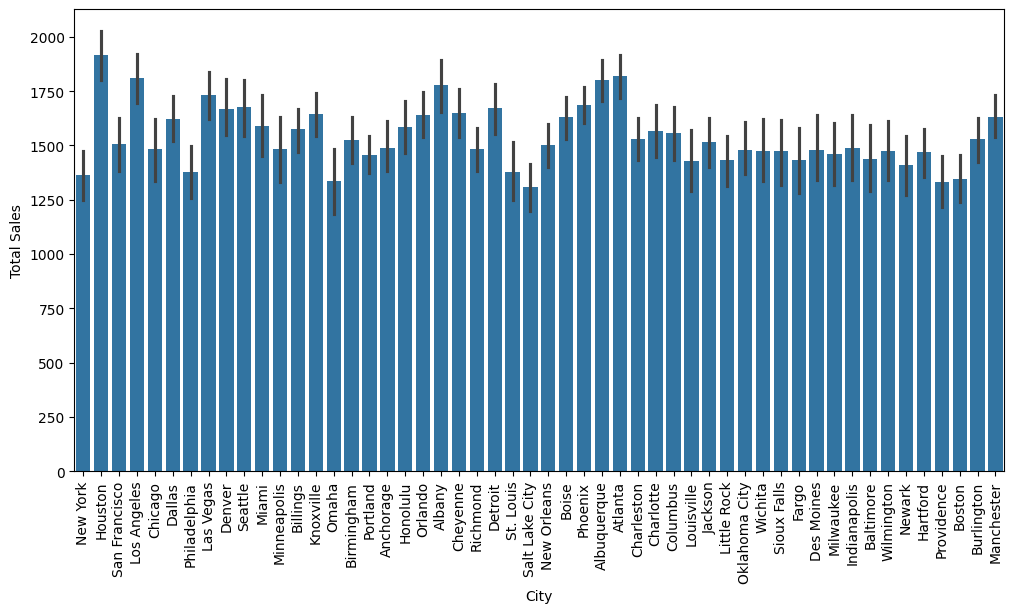

In [ ]:


plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Total Sales', data=df)
plt.xticks(rotation=90)
plt.show()


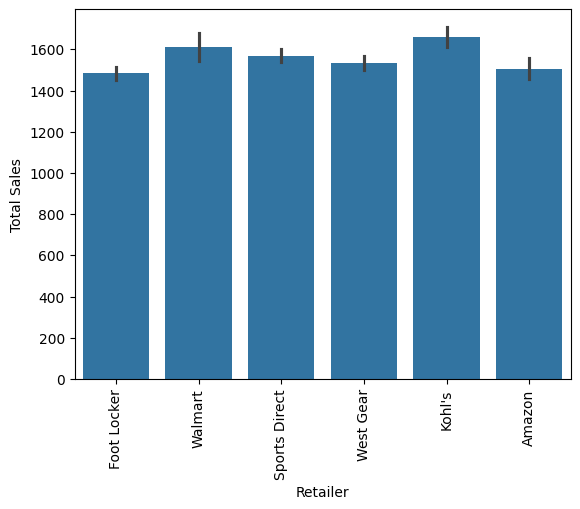

In [ ]:


sns.barplot(x='Retailer', y='Total Sales', data=df)
plt.xticks(rotation=90)
plt.show()


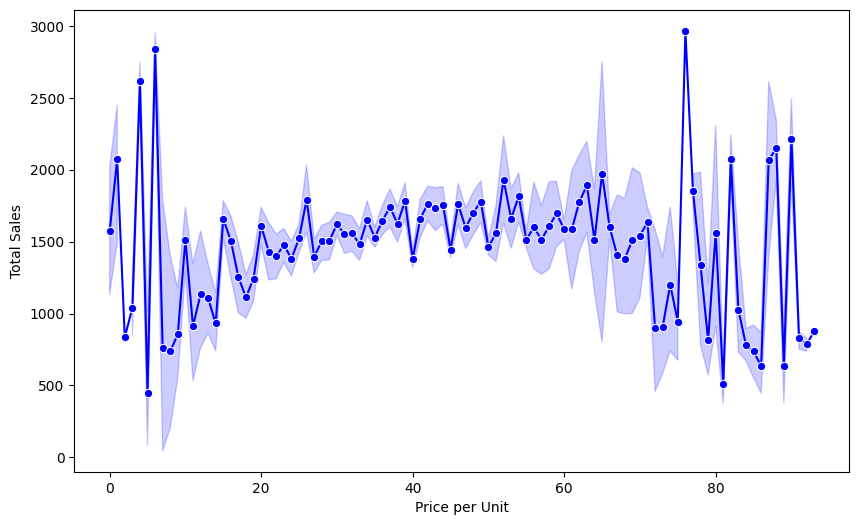

In [ ]:


plt.figure(figsize=(10, 6))
sns.lineplot(x = 'Price per Unit', y = 'Total Sales', data = df,linestyle='-', marker='o', color='blue')
plt.show()


<ipython-input-106-fc4e4689be37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Moving Average'] = df['Total Sales'].rolling(window=window_size).mean()


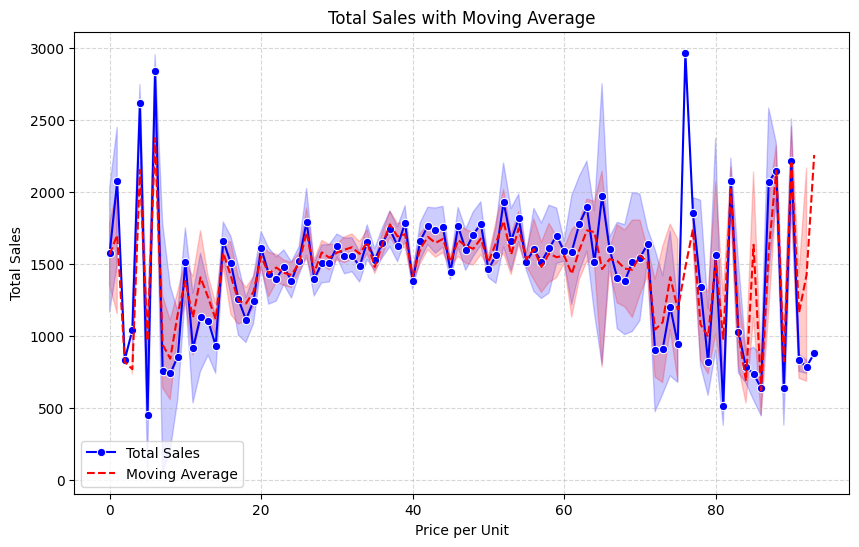

In [ ]:


window_size = 3
df['Moving Average'] = df['Total Sales'].rolling(window=window_size).mean()


plt.figure(figsize=(10, 6))
sns.lineplot(x='Price per Unit', y='Total Sales', data=df, linestyle='-', marker='o', color='blue', label='Total Sales')
sns.lineplot(x='Price per Unit', y='Moving Average', data=df, linestyle='--', color='red', label='Moving Average')

plt.xlabel('Price per Unit')
plt.ylabel('Total Sales')
plt.title('Total Sales with Moving Average')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


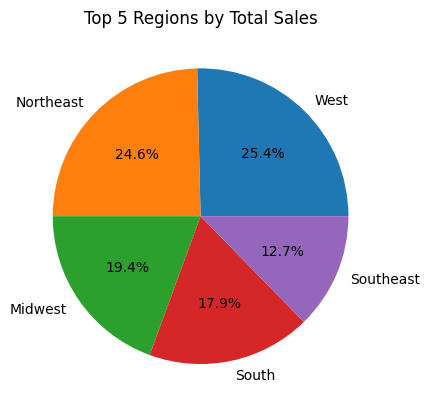

In [ ]:




top_5_regions = df['Region'].value_counts().head(5)
plt.pie(top_5_regions, labels=top_5_regions.index, autopct="%1.1f%%")
plt.title("Top 5 Regions by Total Sales")
plt.show()


In [ ]:
#df.to_csv('pre_processed_adidas_data.csv', index=False)

In [ ]:
#from google.colab import files

#files.download('pre_processed_adidas_data.csv')


In [ ]:



price_range_df = df[['Price per Unit', 'Product\t']]


grouped_df = price_range_df.groupby('Product\t')['Price per Unit'].agg(['min', 'max', 'mean'])


print(grouped_df)


                           min  max       mean
Product\t                                     
Men's Apparel               11   90  45.417808
Men's Athletic Footwear      5   90  38.826087
Men's Street Footwear        0   90  39.371429
Women's Apparel              1   93  45.812189
Women's Athletic Footwear    0   88  36.188045
Women's Street Footwear      0   90  35.682836


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


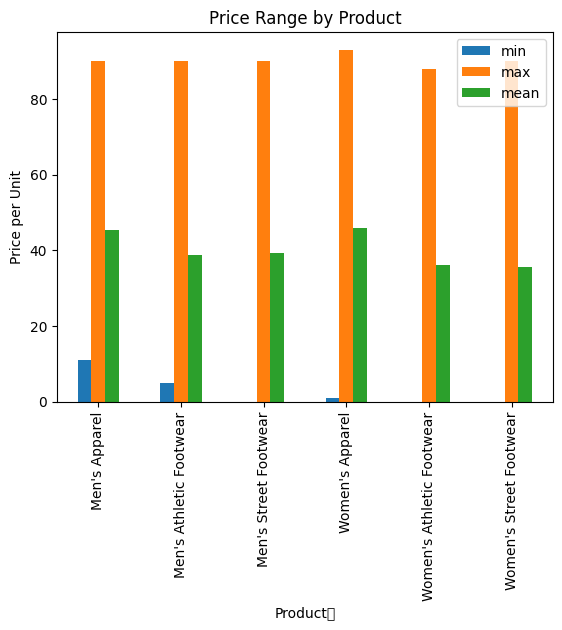

In [ ]:



grouped_df.plot(kind='bar', ylabel='Price per Unit', title='Price Range by Product')
plt.xticks(rotation=90)
plt.show()


In [ ]:

sales_range_df = df[['Total Sales', 'City']]


grouped_df1 = sales_range_df.groupby('City')['Total Sales'].agg(['min', 'max', 'mean'])


print(grouped_df1)

                min   max         mean
City                                  
Albany          331  3105  1776.902778
Albuquerque     285  3081  1800.777778
Anchorage       204  3129  1487.743056
Atlanta         225  3125  1821.750000
Baltimore         6  3135  1437.076389
Billings        295  3108  1575.493056
Birmingham      153  3123  1524.509259
Boise           298  3125  1629.981481
Boston           25  3125  1344.976852
Burlington       40  3125  1528.689815
Charleston       22  3129  1531.802083
Charlotte       286  3100  1565.465278
Cheyenne        238  3107  1648.277778
Chicago          20  3129  1485.027778
Columbus        111  3122  1556.743056
Dallas          226  3081  1622.680556
Denver          300  3108  1669.312500
Des Moines       12  3125  1480.208333
Detroit         226  3129  1671.138889
Fargo            14  3125  1434.381944
Hartford         15  3131  1470.930556
Honolulu        210  3106  1585.486111
Houston         275  3107  1915.365741
Indianapolis      3  3131

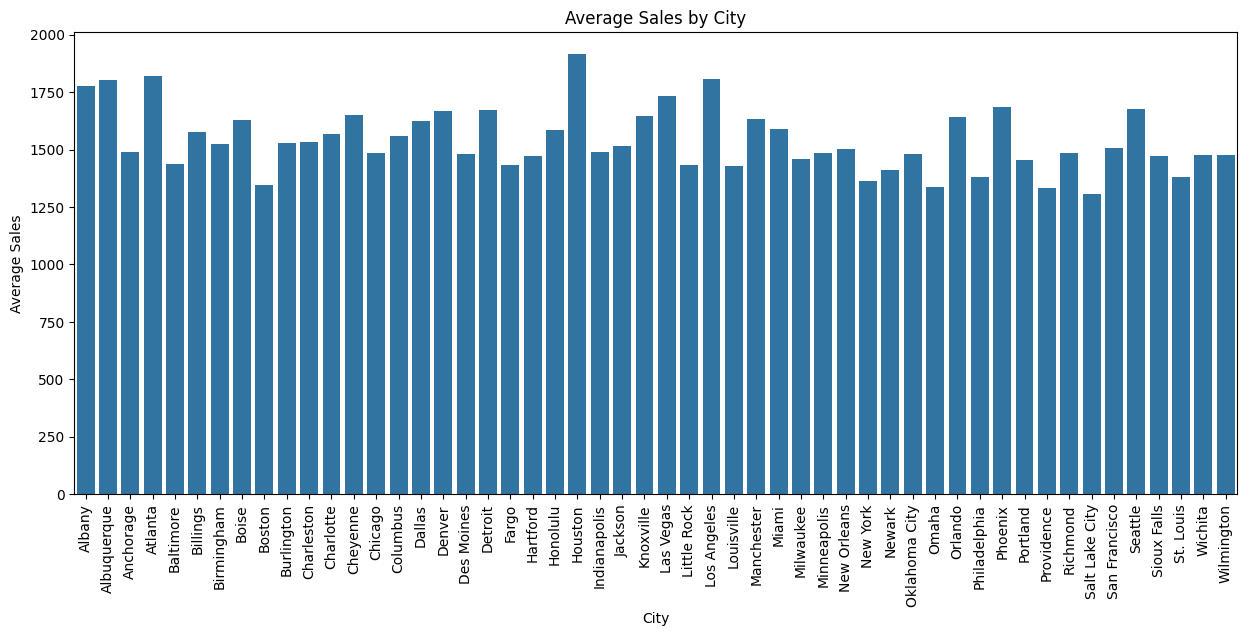

In [ ]:



plt.figure(figsize=(15, 6))
sns.barplot(x='City', y='mean', data=grouped_df1)
plt.xticks(rotation=90)
plt.ylabel('Average Sales')
plt.xlabel('City')
plt.title('Average Sales by City')
plt.show()


<ipython-input-116-026d12c9412c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_series['Invoice Date'] = pd.to_datetime(df_time_series['Invoice Date'])


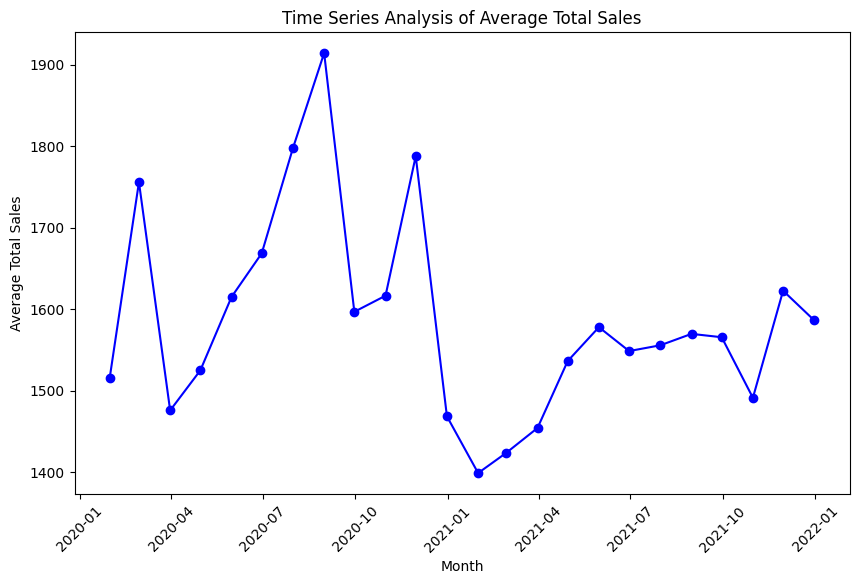

In [ ]:



df_time_series = df[['Invoice Date', 'Total Sales']]


df_time_series['Invoice Date'] = pd.to_datetime(df_time_series['Invoice Date'])


grouped_df = df_time_series.groupby(pd.Grouper(key='Invoice Date', freq='M'))['Total Sales'].mean()


grouped_df = grouped_df.reset_index()
plt.figure(figsize=(10, 6))


plt.plot(grouped_df['Invoice Date'], grouped_df['Total Sales'],linestyle='-', marker='o', color='blue')
plt.xlabel('Month')
plt.ylabel('Average Total Sales')
plt.title('Time Series Analysis of Average Total Sales')
plt.xticks(rotation=45)
plt.show()


<ipython-input-117-714d1fef67d7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_series['Invoice Date'] = pd.to_datetime(df_time_series['Invoice Date'])


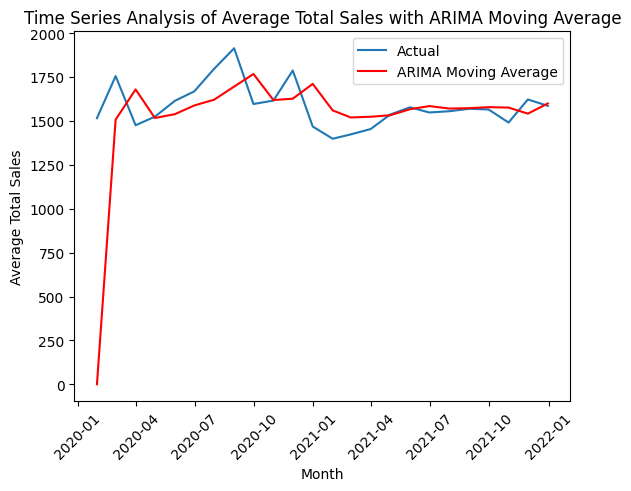

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


df_time_series = df[['Invoice Date', 'Total Sales']]


df_time_series['Invoice Date'] = pd.to_datetime(df_time_series['Invoice Date'])


grouped_df = df_time_series.groupby(pd.Grouper(key='Invoice Date', freq='M'))['Total Sales'].mean()


grouped_df = grouped_df.reset_index()


model = ARIMA(grouped_df['Total Sales'], order=(1,1,1))
model_fit = model.fit()


predictions = model_fit.predict(start=0, end=len(grouped_df)-1)


plt.plot(grouped_df['Invoice Date'], grouped_df['Total Sales'], label='Actual')
plt.plot(grouped_df['Invoice Date'], predictions, color='red', label='ARIMA Moving Average')
plt.xlabel('Month')
plt.ylabel('Average Total Sales')
plt.title('Time Series Analysis of Average Total Sales with ARIMA Moving Average')
plt.xticks(rotation=45)
plt.legend()
plt.show()


<ipython-input-118-6083b05d26e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_series['Invoice Date'] = pd.to_datetime(df_time_series['Invoice Date'])


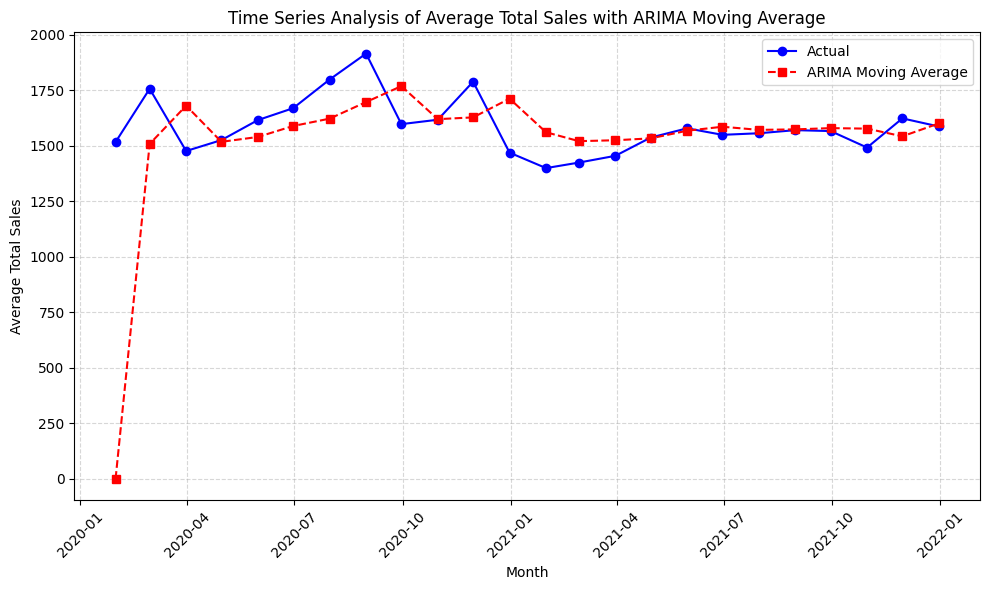

In [ ]:

df_time_series = df[['Invoice Date', 'Total Sales']]
df_time_series['Invoice Date'] = pd.to_datetime(df_time_series['Invoice Date'])
grouped_df = df_time_series.groupby(pd.Grouper(key='Invoice Date', freq='M'))['Total Sales'].mean()
grouped_df = grouped_df.reset_index()

model = ARIMA(grouped_df['Total Sales'], order=(1,1,1))
model_fit = model.fit()
predictions = model_fit.predict(start=0, end=len(grouped_df)-1)

plt.figure(figsize=(10, 6))

plt.plot(grouped_df['Invoice Date'], grouped_df['Total Sales'], linestyle='-', marker='o', color='blue', label='Actual')


plt.plot(grouped_df['Invoice Date'], predictions, linestyle='--', marker='s', color='red', label='ARIMA Moving Average')

plt.xlabel('Month')
plt.ylabel('Average Total Sales')
plt.title('Time Series Analysis of Average Total Sales with ARIMA Moving Average')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<ipython-input-119-9b449ecb3cec>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_series['Invoice Date'] = pd.to_datetime(df_time_series['Invoice Date'])


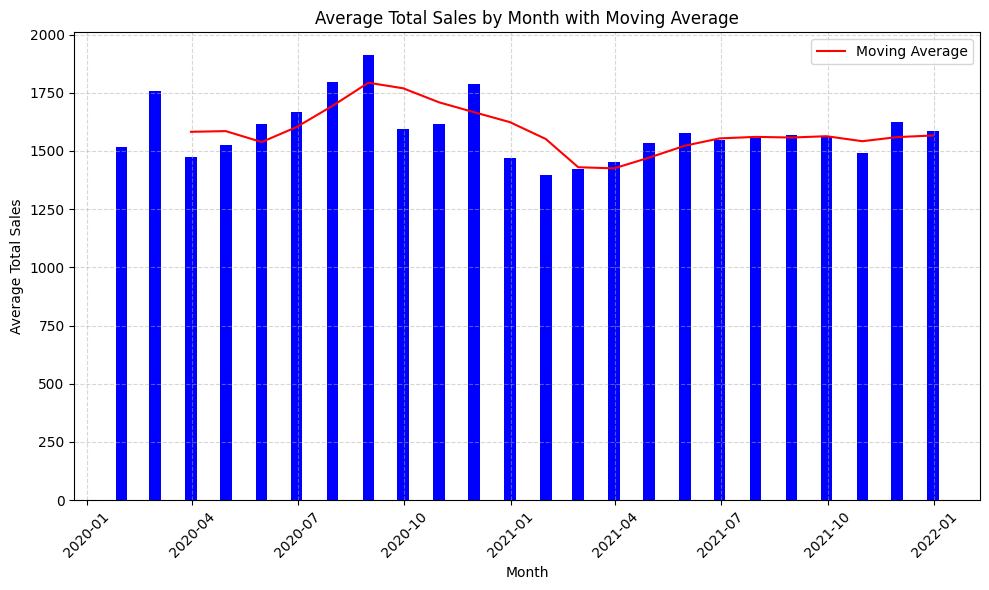

In [ ]:

grouped_df = df_time_series.groupby(pd.Grouper(key='Invoice Date', freq='M'))['Total Sales'].mean()


grouped_df = grouped_df.reset_index()

grouped_df['Moving Average'] = grouped_df['Total Sales'].rolling(window=3).mean()


plt.figure(figsize=(10, 6))
plt.title('Average Total Sales by Month with Moving Average')
plt.xlabel('Month')
plt.ylabel('Average Total Sales')
plt.bar(grouped_df['Invoice Date'], grouped_df['Total Sales'], color='blue', width=10)


plt.plot(grouped_df['Invoice Date'], grouped_df['Moving Average'], color='red', label='Moving Average')


plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()


plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder


columns_to_encode = [ 'Product\t', 'Region','Retailer','City','Sales Method']

label_encoder = LabelEncoder()

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

df


<ipython-input-120-09757d1b5b3e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
<ipython-input-120-09757d1b5b3e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
<ipython-input-120-09757d1b5b3e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

,Retailer,Retailer_id,Invoice Date,Region,State\t,City,Product\t,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Moving Average
4,1,1185732,1/1/2020,1,31,35,2,45,"1,200",2472,2475,36,0,NaN
5,1,1185732,1/2/2020,1,31,35,1,45,"1,000",2188,954,16,0,NaN
6,1,1185732,1/3/2020,1,31,35,5,35,"1,000",1898,924,21,0,2186.000000
7,1,1185732,1/4/2020,1,31,35,4,40,850,1637,906,21,0,1907.666667
8,1,1185732,1/5/2020,1,31,35,0,55,900,2209,988,16,0,1914.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,1,1185732,1/24/2021,1,28,30,0,45,64,1362,4036,14,2,993.666667
9648,1,1185732,1/24/2021,1,28,30,3,36,105,1721,294,18,2,1089.333333
9649,1,1185732,2/22/2021,1,28,30,2,36,184,2630,1616,23,2,1904.333333
9650,1,1185732,2/22/2021,1,28,30,1,37,70,1194,189,28,2,1848.333333


<ipython-input-121-2080efc1067d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


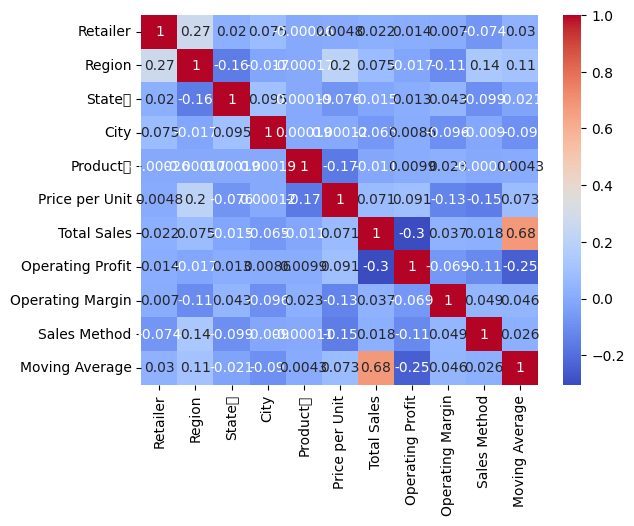

In [ ]:


import seaborn as sns

corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()


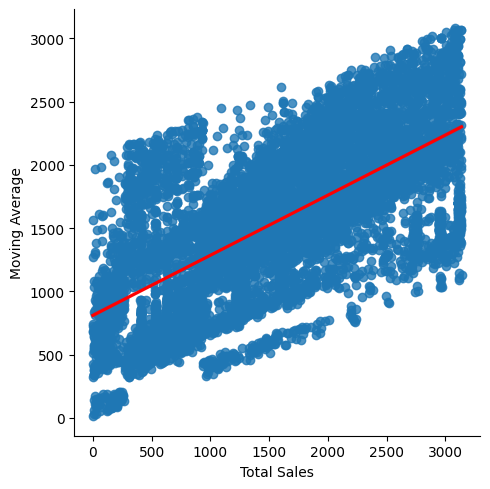

In [ ]:




sns.lmplot(x='Total Sales', y='Moving Average', data=df, line_kws={'color': 'red'})

plt.show()




In [ ]:
import numpy as np
from scipy.stats import chi2_contingency

table = np.array([df['Total Sales'], df['Moving Average']])


table = table.T


chi2_stat = chi2_contingency(table)


chi2_statistic = chi2_stat[0]
p_value = chi2_stat[1]

value = chi2_statistic, p_value

print(value)


(nan, nan)
